<a href="https://colab.research.google.com/github/Purva-2607/BML/blob/main/BML_exp4_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 4 - Logistic Regression

Logistic Regression is a supervised machine learning algorithm used for classification problems.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Loading the dataset

In [40]:
df=pd.read_csv("/content/Iris.csv")
print("The first 5 values are: ")
print(df.head())

print("The first 10 values are: ")
print(df.head(10))

print("The last 5 values are: ")
print(df.tail())


The first 5 values are: 
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
The first 10 values are: 
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4     

#EDA

In [41]:
print("Summary: ")
print(df.describe())
print()

print("Missing Values: ")
print(df.isnull().sum())
print()

print("Information of iris dataset: ")
print(df.info())
print()

print("Duplicate values: ")
print(df.duplicated().sum())
print()

print("Size of the dataset: ")
print(df.size)
print()


Summary: 
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Missing Values: 
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Information of iris dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Nu

Assigning the values of x variable(independent variable) and y variable(dependent variable)

In [42]:
X=df.drop(['Species'],axis=1)
y=df['Species']

#Train-test split

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0.5, 1.02, 'Iris Feature Relationships')

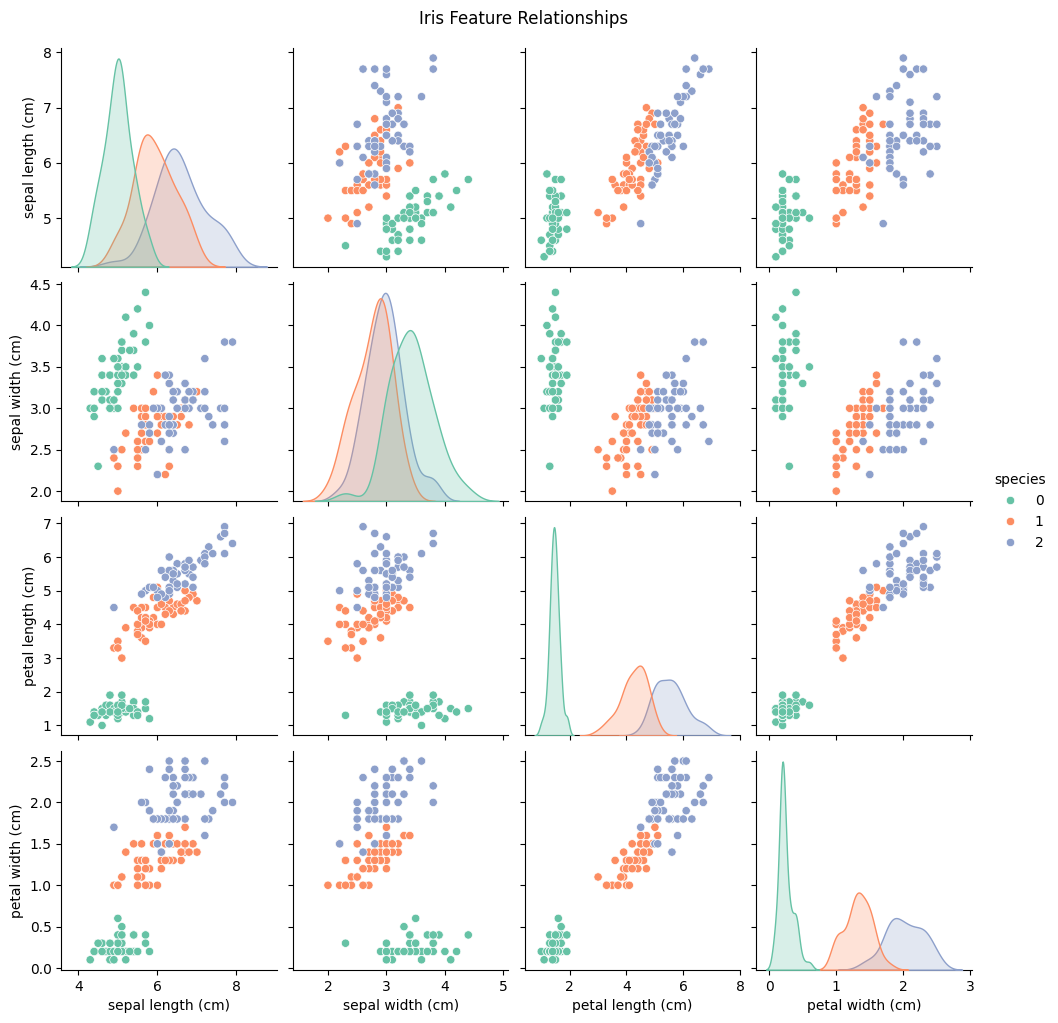

In [45]:
import seaborn as sns

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

sns.pairplot(df, hue='species', palette='Set2')
plt.suptitle("Iris Feature Relationships", y=1.02)

Model creation and fitting of the model

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

#Data Visulization

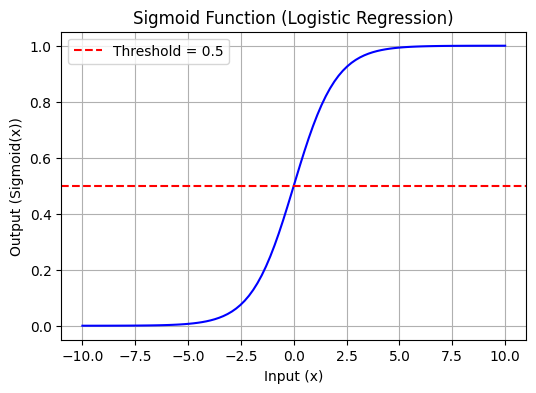

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values for x
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, color='blue')
plt.title("Sigmoid Function (Logistic Regression)")
plt.xlabel("Input (x)")
plt.ylabel("Output (Sigmoid(x))")

# horizontal line at 0.5 (decision threshold)
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.grid(True)
plt.show()


Accuracy of the model

In [48]:
#accuracy of the model
print("Accuracy:(of train) ", model.score(X_train, y_train))
print("test accuracy: ", model.score(X_test, y_test))

Accuracy:(of train)  1.0
test accuracy:  1.0


In [49]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[ 9  0  0]
 [ 0 11  0]
 [ 0  0 10]]
